In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random


In [3]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


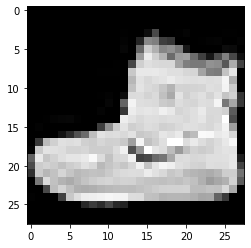

In [5]:
plt.imshow(X_train[0],cmap='gray')

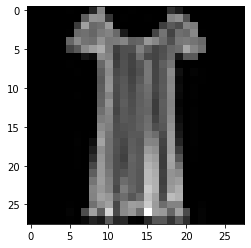

In [11]:
i = random.randint(1,60000)
plt.imshow(X_train[i],cmap = 'gray')

In [12]:
label = y_train[i]
label

3

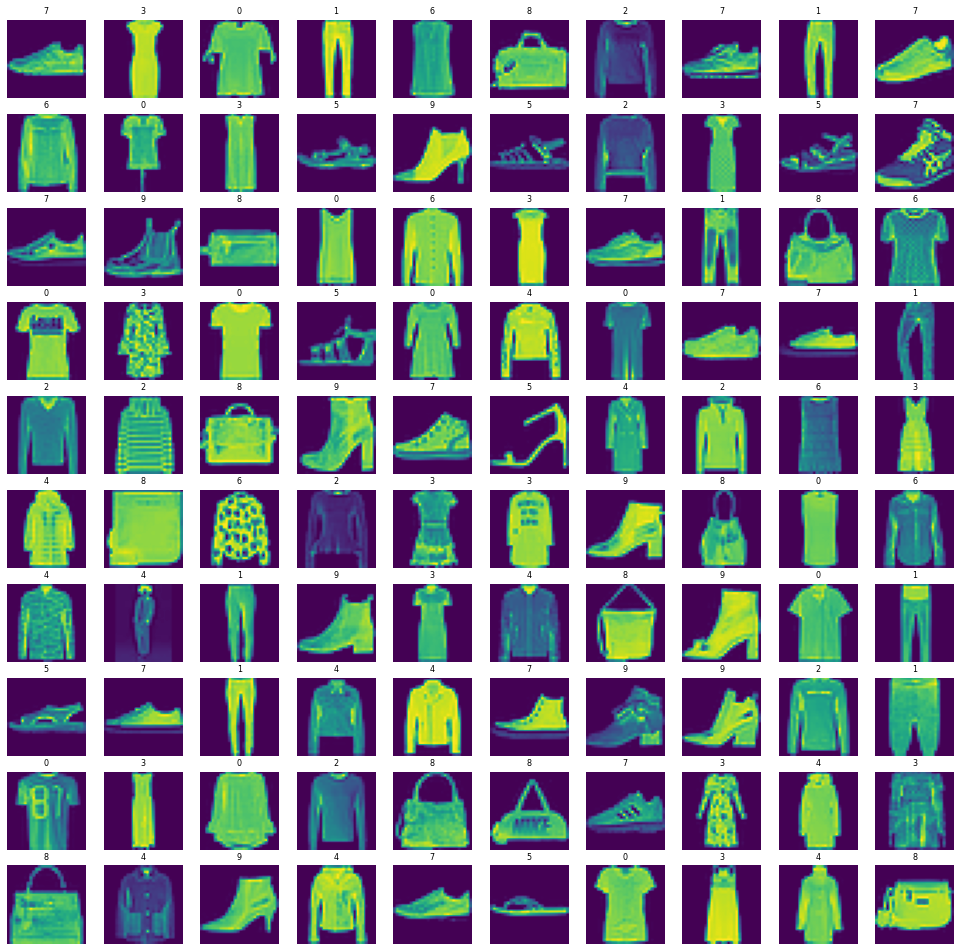

In [57]:
W_grid = 10
L_grid = 10
fig,axes = plt.subplots(L_grid,W_grid,figsize=(17,17))

axes = axes.ravel()  #flatten image to 255 array

n_training  = len(X_train) #get the length of training dataset

for i in np.arange(0,W_grid * L_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index],fontsize= 8)
  axes[i].axis('off')


In [19]:
X_train = X_train/255
X_test = X_test/255

In [58]:
X_train.shape

(60000, 28, 28)

In [31]:
#adding noise

noise_factor = 0.3
noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image,0,1)
  noise_dataset.append(noisy_image)

In [34]:
noise_dataset = np.array(noise_dataset)

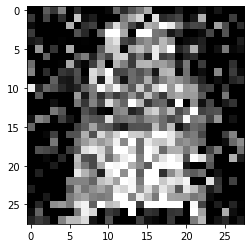

In [23]:
plt.imshow(noise_dataset[22],cmap='gray')

In [47]:
noise_factor = 0.3
noise_test_dataset = []

for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image,0,1)
  noise_test_dataset.append(noisy_image)

In [48]:
noise_test_dataset = np.array(noise_test_dataset)

In [49]:
autoencoder = tf.keras.models.Sequential()

#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16,kernel_size=3,strides=2,padding='same',input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8,kernel_size=3,strides=2,padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(filters = 8,kernel_size=3,strides=1,padding='same'))


#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16,kernel_size=3,strides=2,padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1,kernel_size=3,strides=2,activation='sigmoid',padding='same'))






In [50]:
autoencoder.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


(60000, 28, 28)

In [51]:
autoencoder.fit(noise_dataset.reshape(-1,28,28,1),
                X_train.reshape(-1,28,28,1),
                epochs = 10,
                batch_size=200,
                validation_data = (noise_test_dataset.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1)))

Epoch 1/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3947 - val_loss: 0.3261
Epoch 2/10
300/300 [==============================] - 15s 49ms/step - loss: 0.3168 - val_loss: 0.3142
Epoch 3/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3098 - val_loss: 0.3105
Epoch 4/10
300/300 [==============================] - 15s 49ms/step - loss: 0.3068 - val_loss: 0.3079
Epoch 5/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3048 - val_loss: 0.3063
Epoch 6/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3036 - val_loss: 0.3053
Epoch 7/10
300/300 [==============================] - 15s 49ms/step - loss: 0.3028 - val_loss: 0.3046
Epoch 8/10
300/300 [==============================] - 15s 50ms/step - loss: 0.3021 - val_loss: 0.3040
Epoch 9/10
300/300 [==============================] - 15s 49ms/step - loss: 0.3015 - val_loss: 0.3035
Epoch 10/10
300/300 [==============================] - 15s 50ms/step - loss: 0.301

In [52]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1))
print('Test Accuracy: {:.3f}'.format(evaluation))

313/313 [==============================] - 1s 5ms/step - loss: 0.3034
Test Accuracy: 0.303


In [53]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1,28,28,1))

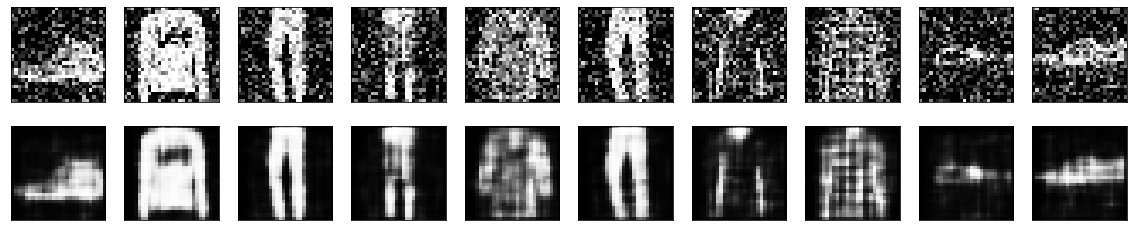

In [54]:
fig ,axes = plt.subplots(nrows=2,ncols=10,sharex=True,sharey=True,figsize=(20,4))
for images,row in zip([noise_test_dataset[:10],predicted],axes):
  for img,ax in zip(images,row):
    ax.imshow(img.reshape((28,28)),cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
